In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


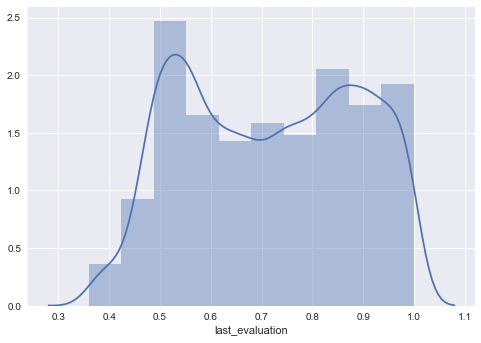

There are 7802 employees evaluated more than 0.7
There are 7197 employees evaluated less than 0.7


In [3]:
f, ax1 = plt.subplots(1, 1)
sns.distplot(data['last_evaluation'], bins=10, norm_hist=False)
plt.show()
print('There are {} employees evaluated more than 0.7'.format(len(data[data['last_evaluation'] > 0.7])))
print('There are {} employees evaluated less than 0.7'.format(len(data[data['last_evaluation'] <= 0.7])))

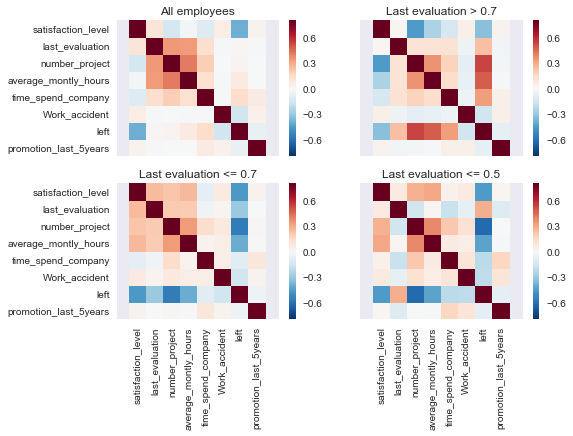

In [8]:
corrmat = data.corr()
f, axarr = plt.subplots(2, 2, sharey=True)

sns.heatmap(corrmat, vmax=0.8, square=True, ax=axarr[0, 0])
axarr[0, 0].set_title('All employees')
axarr[0, 0].xaxis.set_visible(False)

ge = data[data['last_evaluation'] >= 0.7]
gecorrmat = ge.corr()
axarr[0, 1].xaxis.set_visible(False)
axarr[0, 1].set_title('Last evaluation > 0.7')
sns.heatmap(gecorrmat, vmax=0.8, square=True, ax=axarr[0, 1])

be = data[data['last_evaluation'] <= 0.7]
becorrmat = be.corr()
sns.heatmap(becorrmat, vmax=0.8, square=True, ax=axarr[1, 0])
axarr[1, 0].set_title('Last evaluation <= 0.7')

vbe = data[data['last_evaluation'] <= 0.5]
vbecorrmat = vbe.corr()
sns.heatmap(vbecorrmat, vmax=0.8, square=True, ax=axarr[1, 1])
axarr[1, 1].set_title('Last evaluation <= 0.5')

plt.show()

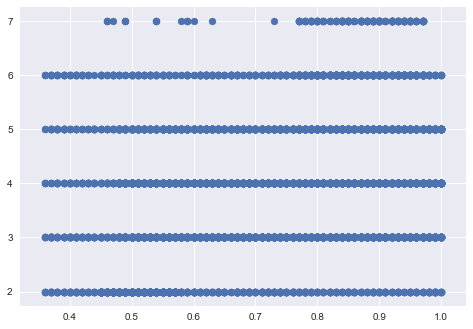

In [9]:
# It seems that:
# 1. employees with last_evaluation > 0.7 are more likely to leave if they work on many projects
# 2. employees with las_evaluation < 0.7 are more likely to leave if they work on few projects
whle_df = data[['last_evaluation', 'number_project']].copy()
f, ax1 = plt.subplots(1, 1)
ax1.scatter(data['last_evaluation'], data['number_project'])
plt.show()

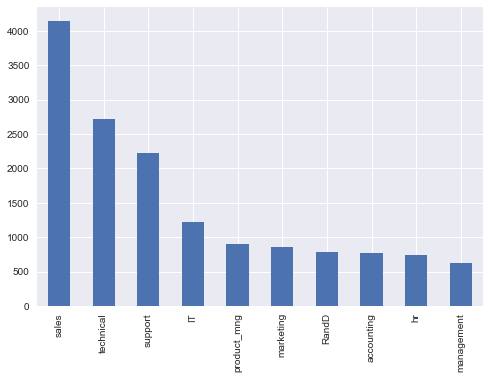

In [10]:
# Department analysis
vc = data['sales'].value_counts().plot(kind='bar')
plt.show()

In [12]:
%%time
sales = data[data['sales']=='sales']['number_project']
tec = data[data['sales']=='technical']['number_project']
support = data[data['sales']=='support']['number_project']
it = data[data['sales']=='IT']['number_project']
hr = data[data['sales']=='hr']['number_project']
product_mng = data[data['sales']=='product_mng']['number_project']

print('sales mean projects {0} with variance {1}'.format(sales.mean(),sales.std()))
print('technical mean projects {0} with variance {1}'.format(tec.mean(),tec.std()))
print('support mean projects {0} with variance {1}'.format(support.mean(),support.std()))
print('IT mean projects {0} with variance {1}'.format(it.mean(),it.std()))
print('HR mean projects {0} with variance {1}'.format(hr.mean(),hr.std()))   
print('product_mng mean projects {0} with variance {1}'.format(product_mng.mean(),product_mng.std()))  

sales mean projects 3.776328502415459 with variance 1.242798068357808
technical mean projects 3.8779411764705882 with variance 1.2589475967402388
support mean projects 3.803947958725886 with variance 1.2120959150021104
IT mean projects 3.8166259168704157 with variance 1.2216577508086217
HR mean projects 3.654939106901218 with variance 1.2291675815125718
product_mng mean projects 3.8070953436807096 with variance 1.2440466843899665
Wall time: 66.6 ms


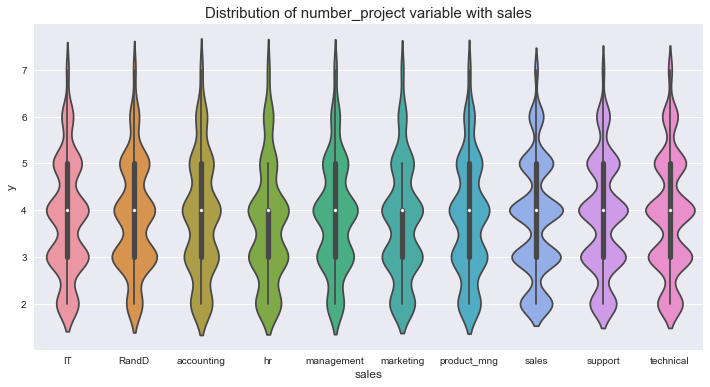

In [13]:
var_name = 'sales'
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12, 6))
sns.violinplot(x=var_name, y='number_project', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Distribution of number_project variable with ' + var_name, fontsize=15)
plt.show()

In [15]:
sales_eval = data[data['sales']=='sales']['last_evaluation']
tec_eval = data[data['sales']=='technical']['last_evaluation']
support_evl = data[data['sales']=='support']['last_evaluation']
it_eval = data[data['sales']=='IT']['last_evaluation']
hr_eval = data[data['sales']=='hr']['last_evaluation']

print('sales mean evaluation {0} with variance {1}'.format(sales_eval.mean(),sales_eval.std()))
print('technical mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('support mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('it mean evaluation {0} with variance {1}'.format(it_eval.mean(),it_eval.std()))
print('hr mean evaluation {0} with variance {1}'.format(hr_eval.mean(),hr_eval.std()))

sales mean evaluation 0.7097173913043466 with variance 0.17145932860167945
technical mean evaluation 0.7210992647058838 with variance 0.17336427600610105
support mean evaluation 0.7210992647058838 with variance 0.17336427600610105
it mean evaluation 0.716829665851672 with variance 0.16450818342711224
hr mean evaluation 0.7088497970230044 with variance 0.17458398995731736


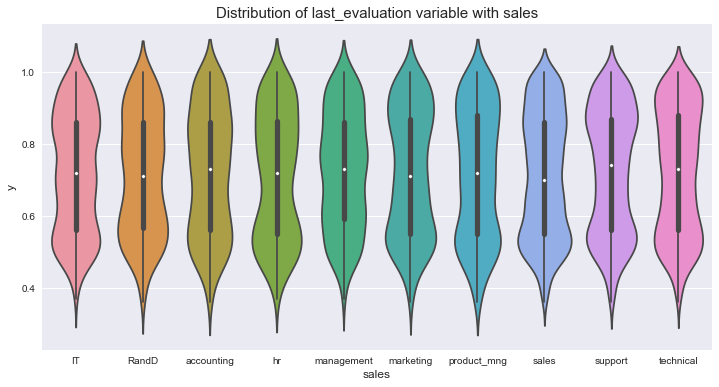

In [16]:

var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='last_evaluation', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of last_evaluation variable with "+var_name, fontsize=15)
plt.show()

In [17]:
sales_eval = data[data['sales']=='sales']['satisfaction_level']
tec_eval = data[data['sales']=='technical']['satisfaction_level']
support_evl = data[data['sales']=='support']['satisfaction_level']
it_eval = data[data['sales']=='IT']['satisfaction_level']
hr_eval = data[data['sales']=='hr']['satisfaction_level']

print('sales mean evaluation {0} with variance {1}'.format(sales_eval.mean(),sales_eval.std()))
print('technical mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('support mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('it mean evaluation {0} with variance {1}'.format(it_eval.mean(),it_eval.std()))
print('hr mean evaluation {0} with variance {1}'.format(hr_eval.mean(),hr_eval.std()))

sales mean evaluation 0.614446859903383 with variance 0.25025082044985275
technical mean evaluation 0.6078970588235295 with variance 0.2541932056427754
support mean evaluation 0.6078970588235295 with variance 0.2541932056427754
it mean evaluation 0.6181418092909551 with variance 0.24990302087228874
hr mean evaluation 0.5988092016238159 with variance 0.24792896115563812


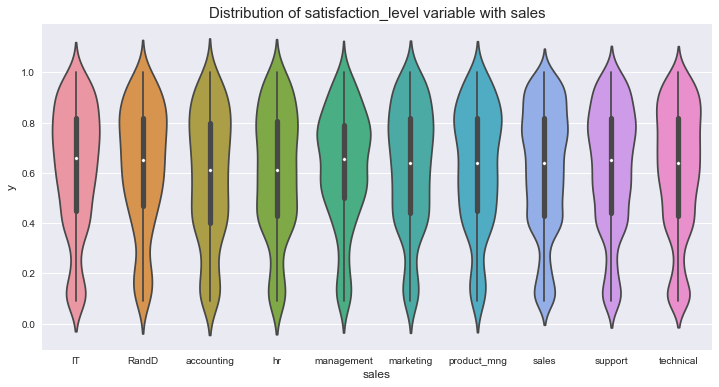

In [18]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='satisfaction_level', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of satisfaction_level variable with "+var_name, fontsize=15)
plt.show()

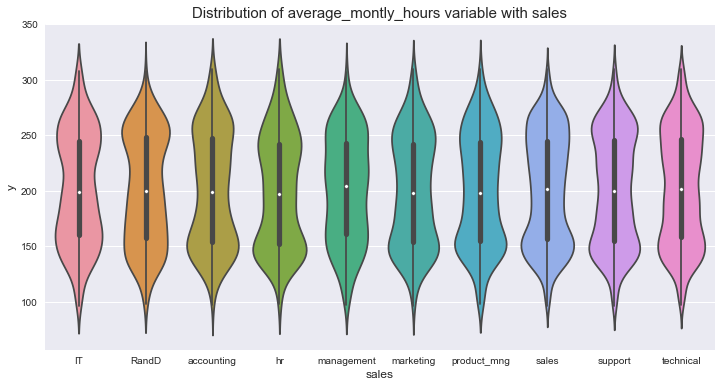

In [19]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='average_montly_hours', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average_montly_hours variable with "+var_name, fontsize=15)
plt.show()

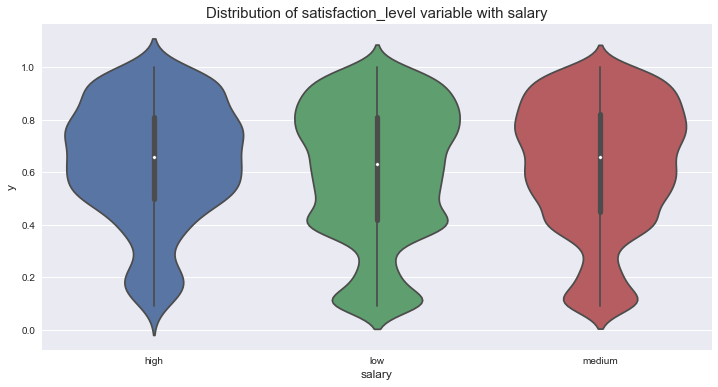

In [20]:
var_name = "salary"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='satisfaction_level', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of satisfaction_level variable with "+var_name, fontsize=15)
plt.show()

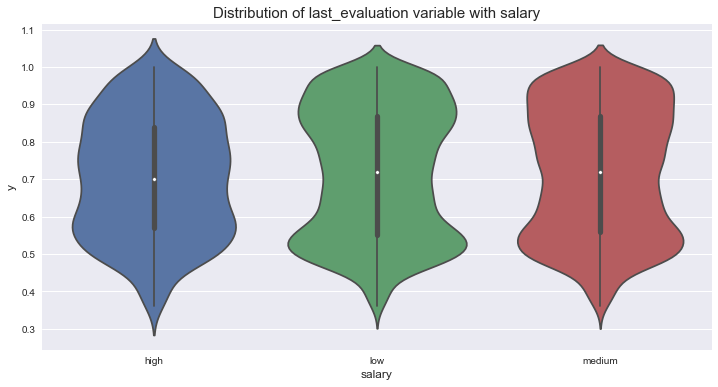

In [21]:
var_name = "salary"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='last_evaluation', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of last_evaluation variable with "+var_name, fontsize=15)
plt.show()

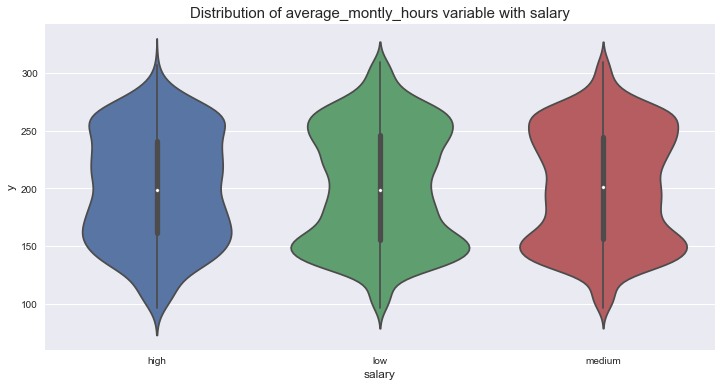

In [22]:
var_name = "salary"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='average_montly_hours', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average_montly_hours variable with "+var_name, fontsize=15)
plt.show()